<a href="https://colab.research.google.com/github/Davz33/tutorials/blob/data/PandaswithD3jsViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d3blocks
import d3blocks
print(d3blocks.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
1.2.8


In [2]:
from d3blocks import D3Blocks
import pandas as pd
!mkdir data && cd data && wget https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2021-financial-year-provisional/Download-data/annual-enterprise-survey-2021-financial-year-provisional-csv.csv

mkdir: cannot create directory ‘data’: File exists


In [3]:
data=pd.read_csv('data/annual-enterprise-survey-2021-financial-year-provisional-csv.csv',
    dtype={'Value':str},
    parse_dates=['Year'])
data.Value=data.Value.apply(lambda x : pd.to_numeric(x.replace(",",""),errors='coerce'))
data.sample(frac=1).reset_index(drop=True).head(100)

,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
0,2019-01-01,Level 4,EE113,Non-Residential Building Construction,Dollars (millions),H12,Salaries and wages paid,Financial performance,1053.0,ANZSIC06 group E302
1,2020-01-01,Level 4,MN211,Travel Agency and Tour Arrangement Services,Dollars (millions),H11,Depreciation,Financial performance,56.0,ANZSIC06 group N722
2,2021-01-01,Level 3,II11,Road Transport,Dollars (millions),H29,Other assets,Financial position,1996.0,ANZSIC06 groups I461 and I462
3,2020-01-01,Level 3,AA21,Forestry and Logging,Dollars (millions),H06,"Government funding, grants and subsidies",Financial performance,13.0,ANZSIC06 group A030
4,2020-01-01,Level 4,MN114,Veterinary and Other Professional Services,Dollars (millions),H09,Interest and donations,Financial performance,18.0,ANZSIC06 groups M697 and M699
...,...,...,...,...,...,...,...,...,...,...
95,2017-01-01,Level 1,FF,Wholesale Trade,Percentage,H37,Quick ratio,Financial ratios,93.0,ANZSIC06 division F
96,2019-01-01,Level 1,GH,Retail Trade and Accommodation,Percentage,H39,Return on equity,Financial ratios,27.0,ANZSIC06 divisions G and H
97,2017-01-01,Level 3,CC15,Beverage and Tobacco Product Manufacturing,Dollars (millions),H24,Total assets,Financial position,8692.0,ANZSIC06 groups C121 and C122
98,2017-01-01,Level 1,99999,All industries,Dollars (millions),H14,Salaries and wages to self employed commission...,Financial performance,1910.0,ANZSIC06 divisions A-S (excluding classes K633...


In [4]:
print(data.dtypes,
data.columns)
data.describe(include='all')

Year                           datetime64[ns]
Industry_aggregation_NZSIOC            object
Industry_code_NZSIOC                   object
Industry_name_NZSIOC                   object
Units                                  object
Variable_code                          object
Variable_name                          object
Variable_category                      object
Value                                 float64
Industry_code_ANZSIC06                 object
dtype: object Index(['Year', 'Industry_aggregation_NZSIOC', 'Industry_code_NZSIOC',
       'Industry_name_NZSIOC', 'Units', 'Variable_code', 'Variable_name',
       'Variable_category', 'Value', 'Industry_code_ANZSIC06'],
      dtype='object')


<ipython-input-4-e658d02b4437>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,Year,Industry_aggregation_NZSIOC,Industry_code_NZSIOC,Industry_name_NZSIOC,Units,Variable_code,Variable_name,Variable_category,Value,Industry_code_ANZSIC06
count,41715,41715,41715,41715,41715,41715,41715,41715,3.978200e+04,41715
unique,9,3,139,119,3,39,41,3,NaN,121
top,2021-01-01 00:00:00,Level 4,GH12,"Public Order, Safety and Regulatory Services",Dollars (millions),H01,Total income,Financial performance,NaN,ANZSIC06 group C170
freq,4635,22833,324,775,32796,1251,1251,20853,NaN,648
first,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.148284e+04,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.421287e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.523000e+05,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000e+01,NaN


In [5]:
subs=data[['Year','Industry_name_NZSIOC','Value']] \
  .groupby(['Industry_name_NZSIOC','Year'], as_index=False) \
  .agg({'Value':'sum'})

print(subs.dtypes,
subs.columns)
subs.head(100) 

Industry_name_NZSIOC            object
Year                    datetime64[ns]
Value                          float64
dtype: object Index(['Industry_name_NZSIOC', 'Year', 'Value'], dtype='object')


,Industry_name_NZSIOC,Year,Value
0,Accommodation,2013-01-01,159670.0
1,Accommodation,2014-01-01,156790.0
2,Accommodation,2015-01-01,167784.0
3,Accommodation,2016-01-01,178847.0
4,Accommodation,2017-01-01,191337.0
...,...,...,...
95,Auxiliary Finance and Insurance Services,2018-01-01,1152714.0
96,Auxiliary Finance and Insurance Services,2019-01-01,1053492.0
97,Auxiliary Finance and Insurance Services,2020-01-01,1087742.0
98,Auxiliary Finance and Insurance Services,2021-01-01,1227708.0


In [6]:
subs.describe(include='all')

<ipython-input-6-ebcba5a2d5d4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  subs.describe(include='all')


,Industry_name_NZSIOC,Year,Value
count,1054,1054,1.054000e+03
unique,119,9,NaN
top,Accommodation,2013-01-01 00:00:00,NaN
freq,9,118,NaN
first,NaN,2013-01-01 00:00:00,NaN
last,NaN,2021-01-01 00:00:00,NaN
mean,NaN,NaN,1.188283e+06
std,NaN,NaN,2.275647e+06
min,NaN,NaN,5.263000e+03
25%,NaN,NaN,2.652758e+05


In [7]:
dataviz=pd.pivot_table(subs, values = 'Value', index=['Year'], columns = 'Industry_name_NZSIOC').reset_index()
dataviz.dtypes

Industry_name_NZSIOC
Year                                            datetime64[ns]
Accommodation                                          float64
Accommodation and Food Services                        float64
Administrative and Support Services                    float64
Adult, Community and Other Education                   float64
                                                     ...      
Veterinary and Other Professional Services             float64
Warehousing and Storage Services                       float64
Water, Sewerage, Drainage and Waste Services           float64
Wholesale Trade                                        float64
Wood Product Manufacturing                             float64
Length: 120, dtype: object

In [8]:
dataviz.sample(frac=1).reset_index(drop=True).head(100)

Industry_name_NZSIOC,Year,Accommodation,Accommodation and Food Services,Administrative and Support Services,"Adult, Community and Other Education","Advertising, Market Research and Management Services","Agriculture, Forestry and Fishing","Agriculture, Forestry and Fishing Support Services and Hunting",All industries,Arts and Recreation Services,...,"Textile, Leather, Clothing and Footwear Manufacturing",Transport Equipment Manufacturing,Transport Support Services,"Transport, Postal and Warehousing",Travel Agency and Tour Arrangement Services,Veterinary and Other Professional Services,Warehousing and Storage Services,"Water, Sewerage, Drainage and Waste Services",Wholesale Trade,Wood Product Manufacturing
0,2014-01-01,156790.0,182586.0,157228.0,8308.0,584352.0,1180167.0,195912.0,9623297.0,278571.0,...,265470.0,532998.0,467674.0,527926.0,133283.0,227575.0,239524.0,396545.0,1436345.0,665776.0
1,2021-01-01,226046.0,257919.0,216447.0,14867.0,688538.0,1464604.0,259219.0,13571949.0,396520.0,...,291109.0,800940.0,569050.0,615478.0,110416.0,258090.0,304047.0,744334.0,1825508.0,875714.0
2,2018-01-01,201066.0,230834.0,199385.0,12382.0,550133.0,1355921.0,218891.0,11553081.0,355820.0,...,278476.0,696206.0,479103.0,598783.0,172007.0,235704.0,275347.0,616632.0,1621616.0,756994.0
3,2019-01-01,212221.0,244822.0,211924.0,13075.0,658802.0,1367616.0,227767.0,12306770.0,355339.0,...,276326.0,759546.0,509097.0,629579.0,182824.0,237437.0,303344.0,472563.0,1681286.0,816046.0
4,2020-01-01,220412.0,259567.0,218063.0,14506.0,781333.0,1429420.0,246079.0,12950720.0,358039.0,...,291325.0,782332.0,465904.0,616870.0,139019.0,250148.0,343405.0,483526.0,1728314.0,799052.0
5,2015-01-01,167784.0,193209.0,163582.0,9631.0,593984.0,1178502.0,192500.0,10136292.0,293859.0,...,303707.0,537936.0,437725.0,534617.0,135828.0,234462.0,257587.0,445928.0,1468823.0,647144.0
6,2017-01-01,191337.0,220340.0,193005.0,10530.0,813284.0,1269357.0,198550.0,11098290.0,344506.0,...,289351.0,641798.0,454415.0,564036.0,168621.0,230468.0,248638.0,469559.0,1531275.0,739318.0
7,2016-01-01,178847.0,204826.0,177386.0,11271.0,570574.0,1154821.0,181942.0,10647017.0,327094.0,...,306398.0,607634.0,412803.0,546227.0,159063.0,220493.0,224111.0,408521.0,1470518.0,702692.0
8,2013-01-01,159670.0,182503.0,160039.0,8350.0,605510.0,1092213.0,171976.0,9233989.0,306564.0,...,277329.0,528162.0,360325.0,502332.0,130148.0,222779.0,232615.0,435058.0,1379453.0,648466.0


In [9]:
dataviz.describe(include='all')

<ipython-input-9-38e71006fba5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataviz.describe(include='all')


Industry_name_NZSIOC,Year,Accommodation,Accommodation and Food Services,Administrative and Support Services,"Adult, Community and Other Education","Advertising, Market Research and Management Services","Agriculture, Forestry and Fishing","Agriculture, Forestry and Fishing Support Services and Hunting",All industries,Arts and Recreation Services,...,"Textile, Leather, Clothing and Footwear Manufacturing",Transport Equipment Manufacturing,Transport Support Services,"Transport, Postal and Warehousing",Travel Agency and Tour Arrangement Services,Veterinary and Other Professional Services,Warehousing and Storage Services,"Water, Sewerage, Drainage and Waste Services",Wholesale Trade,Wood Product Manufacturing
count,9,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000e+00,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000
unique,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,190463.666667,219622.888889,188562.111111,11435.555556,649612.222222,1.276958e+06,210315.111111,1.123571e+07,335145.777778,...,286610.111111,654172.444444,461788.444444,570649.777778,147912.111111,235239.555556,269846.444444,496962.888889,1.571460e+06,739022.444444
std,NaN,26174.985220,30597.347387,24685.084841,2454.377778,94326.587101,1.327958e+05,29552.764044,1.492820e+06,37082.258008,...,13410.894978,110242.763848,58547.345683,45881.947740,23751.973889,12269.337239,39891.000709,112573.606878,1.504918e+05,80522.420926
min,NaN,156790.000000,182503.000000,157228.000000,8308.000000,550133.000000,1.092213e+06,171976.000000,9.233989e+06,278571.000000,...,265470.000000,528162.000000,360325.000000,502332.000000,110416.000000,220493.000000,224111.000000,396545.000000,1.379453e+06,647144.000000
25%,NaN,167784.000000,193209.000000,163582.000000,9631.000000,584352.000000,1.178502e+06,192500.000000,1.013629e+07,306564.000000,...,277329.000000,537936.000000,437725.000000,534617.000000,133283.000000,227575.000000,239524.000000,435058.000000,1.468823e+06,665776.000000


In [10]:
#10 highest earning industries
topi=dataviz.mean(0).nlargest(10).index.tolist()
print(topi)

['Petroleum and Coal Product Manufacturing', 'All industries', 'Financial Asset Investing', 'Finance', 'Financial and Insurance Services', 'Non-Residential Property Operation', 'Life Insurance', 'Banking and Financing', 'Forestry and Logging', 'Property Operators and Real Estate Services']


<ipython-input-10-ead5e3841001>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  topi=dataviz.mean(0).nlargest(10).index.tolist()


In [11]:
#subset from prev. step and format labels
FIG_SIZE=[1000, 500]
d3 = D3Blocks()
df = dataviz[['Year']+topi]
AIcol_idx = df.columns.get_loc('All industries')
df.columns = ['Year']+df.columns[1:] \
              .str.replace(' ','_').tolist()
df.columns
#Manufacturing

[d3blocks] >INFO> Cleaning edge_properties and config parameters..


Index(['Year', 'Petroleum_and_Coal_Product_Manufacturing', 'All_industries',
       'Financial_Asset_Investing', 'Finance',
       'Financial_and_Insurance_Services',
       'Non-Residential_Property_Operation', 'Life_Insurance',
       'Banking_and_Financing', 'Forestry_and_Logging',
       'Property_Operators_and_Real_Estate_Services'],
      dtype='object')

In [14]:
# Node props
d3 = D3Blocks(chart='Timeseries', frame=False)
d3.set_node_properties(df.columns.values)
d3.node_properties.get(df.columns[AIcol_idx])['color']='#000000'
print(d3.node_properties)
#
d3.set_edge_properties(df, datetime='Year', dt_format='%Y-%m-%d %H:%M:%S')
d3.edge_properties
#
# Show
d3.show(title='  (github.com/Davz33)   D3-powered interactive \
        timeseries within jupyter notebook', figsize=FIG_SIZE)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Timeseries]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/timeseries.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [title]:   (github.com/Davz33)   D3-powered interactive         timeseries within jupyter notebook
[d3blocks] >INFO> Set [figsize]: [1000, 500]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/timeseries.html]
[d3blocks] >INFO> Open browser: /tmp/d3blocks/timeseries.html


{'Year': {'id': 0, 'label': 'Year', 'color': '#e41a1c'}, 'Petroleum_and_Coal_Product_Manufacturing': {'id': 1, 'label': 'Petroleum_and_Coal_Product_Manufacturing', 'color': '#e41a1c'}, 'All_industries': {'id': 2, 'label': 'All_industries', 'color': '#000000'}, 'Financial_Asset_Investing': {'id': 3, 'label': 'Financial_Asset_Investing', 'color': '#4daf4a'}, 'Finance': {'id': 4, 'label': 'Finance', 'color': '#984ea3'}, 'Financial_and_Insurance_Services': {'id': 5, 'label': 'Financial_and_Insurance_Services', 'color': '#ff7f00'}, 'Non-Residential_Property_Operation': {'id': 6, 'label': 'Non-Residential_Property_Operation', 'color': '#ffff33'}, 'Life_Insurance': {'id': 7, 'label': 'Life_Insurance', 'color': '#a65628'}, 'Banking_and_Financing': {'id': 8, 'label': 'Banking_and_Financing', 'color': '#f781bf'}, 'Forestry_and_Logging': {'id': 9, 'label': 'Forestry_and_Logging', 'color': '#999999'}, 'Property_Operators_and_Real_Estate_Services': {'id': 10, 'label': 'Property_Operators_and_Real_E

In [15]:
!head -20 /tmp/d3blocks/timeseries.html 

<!--
Library     : d3blocks
Author      : E.Taskesen
Mail        : erdogant@gmail.com
Github      : https://github.com/d3blocks/d3blocks
License     : GPL3
Forked      : Mike Bostock; https://bl.ocks.org/mbostock/34f08d5e11952a80609169b7917d4172
-->

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8">
<title>  (github.com/Davz33)   D3-powered interactive         timeseries within jupyter notebook</title>
<style>
    
.axis path,
.axis line,
.axis1 path,
.axis1 line {


In [20]:
!pip install git+https://github.com/Davz33/flask-ngrok2-pageprinter.git flask IPython json
from flask_ngrok2_pp import run_with_ngrok
from flask import Flask, send_file
import json
from IPython.display import IFrame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Davz33/flask-ngrok2-pageprinter.git to /tmp/pip-req-build-2sjzh_6f
  Running command git clone --filter=blob:none --quiet https://github.com/Davz33/flask-ngrok2-pageprinter.git /tmp/pip-req-build-2sjzh_6f
  Resolved https://github.com/Davz33/flask-ngrok2-pageprinter.git to commit 4a1b99a575d03981343bac18847227bdbc46db64
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00


Now fo to your ngrok dashboard and copy your auth token. You can then input it directly from this jupyer notebeook here, safely. Paste it when prompted

In [22]:
#type your auth ngrok token within the cell prompt
!pip install getpass
import getpass
authtoken = getpass.getpass()

··········


In [65]:
#kill previously opened tunnelling jobs
!pstree -p

docker-init(1)─┬─node(6)─┬─colab-fileshim.(58)
               │         ├─dap_multiplexer(85)─┬─{dap_multiplexer}(86)
               │         │                     ├─{dap_multiplexer}(87)
               │         │                     ├─{dap_multiplexer}(88)
               │         │                     ├─{dap_multiplexer}(89)
               │         │                     └─{dap_multiplexer}(51687)
               │         ├─jupyter-noteboo(84)─┬─python3(63215)─┬─ngrok(64554)
               │         │                     │                ├─ngrok(65090)
               │         │                     │                ├─ngrok(65831)
               │         │                     │                ├─pstree(75874)
               │         │                     │                ├─{python3}(63221)
               │         │                     │                ├─{python3}(63222)
               │         │                     │                ├─{python3}(63223)
               │         │   

In [25]:
!kill -9 64554

In [66]:
#kill previously initialized flask runs
!fuser -k 5000/tcp

5000/tcp:            66024


In [67]:
#test this, then interrupt
LOGPATH = "ngrok.log"
app = Flask(__name__)
run_with_ngrok(app, logpath=LOGPATH, auth_token=authtoken)
@app.route("/")
def Home():
  return send_file("/tmp/d3blocks/timeseries.html")
app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


[d3blocks] >INFO>  * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://fd6b-35-197-100-213.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [31]:
#we prepare the launch a detached job on the vm
with open("serverrun.py", "w", encoding="utf8") as f:
  lines_import=[
      "from flask_ngrok2_pp import run_with_ngrok",
      "from flask import Flask, send_file",
      "import asyncio",
      "LOGPATH = \"ngrok.log\""
  ]
  for ln in lines_import:
    print(ln+"\n",file=f)
  print("async def server():\n", file=f)
  lines=[
  "app = Flask(__name__)",
  "secret = \""+authtoken+"\"",
  "run_with_ngrok(app, logpath=LOGPATH, auth_token=secret)",
  "@app.route(\"/\")",
  "def Home():",
  "\treturn send_file(\"/tmp/d3blocks/timeseries.html\")",
  "app.run()"]
  for ln in lines:
    print("\t"+ln+"\n",file=f)
  print("asyncio.run(server())",file=f)
  

In [32]:
!grep -v 'secret' serverrun.py

from flask_ngrok2_pp import run_with_ngrok

from flask import Flask, send_file

import asyncio

LOGPATH = "ngrok.log"

async def server():

	app = Flask(__name__)



	@app.route("/")

	def Home():

		return send_file("/tmp/d3blocks/timeseries.html")

	app.run()

asyncio.run(server())


In [68]:
#launch job
!touch nohup.out
!nohup python serverrun.py &

nohup: appending output to 'nohup.out'


In [69]:
!cat nohup.out

Traceback (most recent call last):
  File "<string>", line 1, in <module>
NameError: name 'serverrun' is not defined
  File "<string>", line 1
    /content/serverrun.py
    ^
SyntaxError: invalid syntax
  File "<string>", line 1
    ./serverrun.py
    ^
SyntaxError: invalid syntax
  File "<string>", line 1
    /content/serverrun.py
    ^
SyntaxError: invalid syntax
Argument expected for the -c option
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.
  File "<string>", line 1
    from
       ^
SyntaxError: invalid syntax
 * Serving Flask app "serverrun" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
/usr/local/bin/ngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
 * Running on http://6ac4-35-197-100-213.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
 * Serving Flask app "serverrun" (lazy

In [70]:
#test server running and get tunnel address
with open(LOGPATH,"r",encoding="utf8") as ngroklog:
  src=json.load(ngroklog)['tunnel_address'].replace('http://', 'https://', 1)
  print(src)

https://3acc-35-197-100-213.ngrok.io


In [36]:
#chart is served by our flask app
from IPython.display import IFrame
IFrame(src, '100%',FIG_SIZE[1])

When you'll run the code (e.g. on g. collab.) , the frames, hence the charts, will be interactive but for demonstration purposes, here some copies:  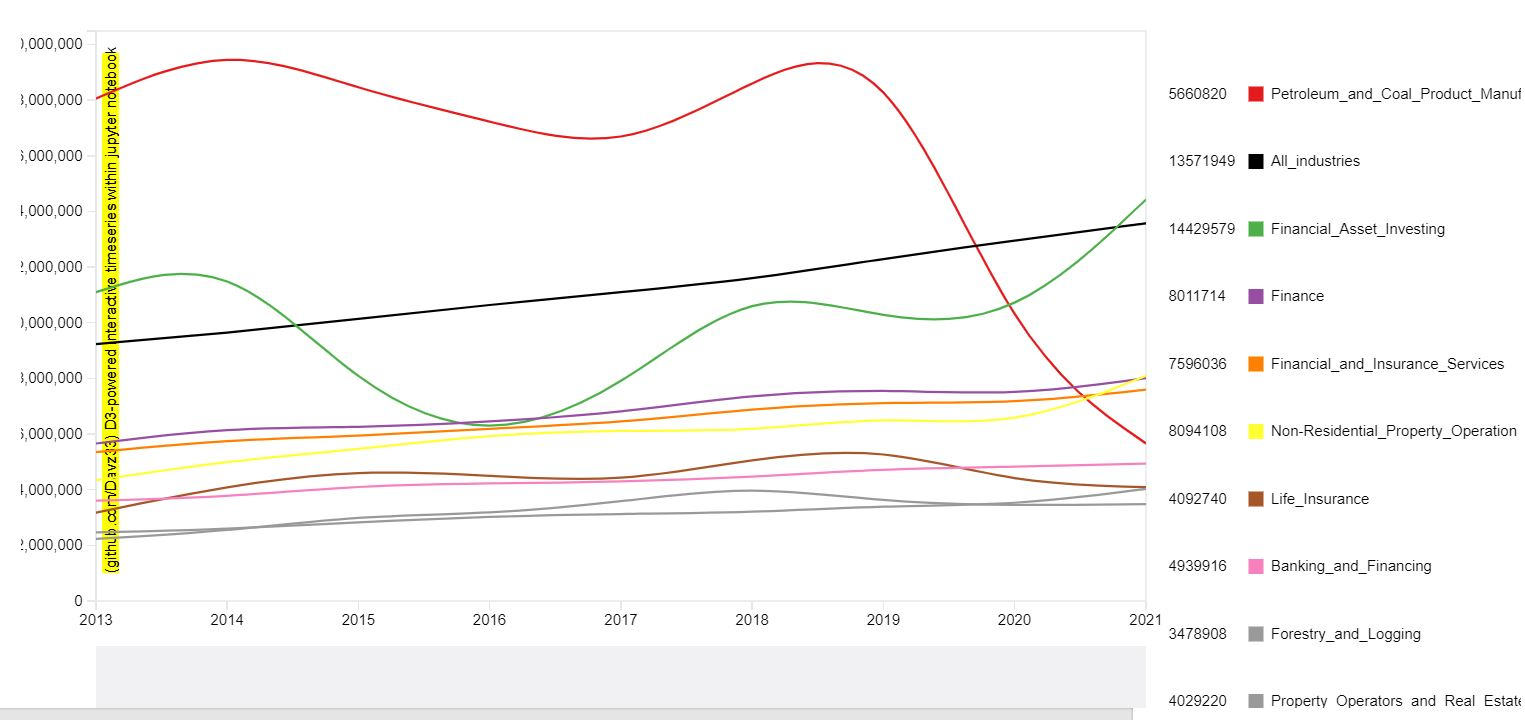





We immediately spot defects as the y axis cut off and the full height not fitting into the cell completely.  
To tweak the style and make it perfect, we can simply re-generate at run-time the D3 charts containing page.

In [42]:
#change
FIG_SIZE=[1000, 600]
# df = dataviz[['Year']+topi]
# do: df.iloc[:,1:] = df.iloc[:,1:].div(df.A, axis=0)
#change: divide values by millions
df.loc[:, df.columns != 'Year'] = df.loc[:, df.columns != 'Year'].div(1000000,axis=0).round(decimals=2)
# AIcol_idx = df.columns.get_loc('All industries')
# df.columns = ['Year']+df.columns[1:] \
#               .str.replace(' ','_').tolist()
# df.columns
#Manufacturing
# Node props
#regenerate d3 obj
d3 = D3Blocks(chart='Timeseries', frame=False)
d3.set_node_properties(df.columns.values)
d3.node_properties.get(df.columns[AIcol_idx])['color']='#000000'
print(d3.node_properties)
#
d3.set_edge_properties(df, datetime='Year', dt_format='%Y-%m-%d %H:%M:%S')
d3.edge_properties
#
# Show
d3.show(title='  (github.com/Davz33)   D3-powered interactive \
        timeseries within jupyter notebook', figsize=FIG_SIZE)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Timeseries]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/timeseries.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [title]:   (github.com/Davz33)   D3-powered interactive         timeseries within jupyter notebook
[d3blocks] >INFO> Set [figsize]: [1000, 500]
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/timeseries.html]


{'Year': {'id': 0, 'label': 'Year', 'color': '#e41a1c'}, 'Petroleum_and_Coal_Product_Manufacturing': {'id': 1, 'label': 'Petroleum_and_Coal_Product_Manufacturing', 'color': '#e41a1c'}, 'All_industries': {'id': 2, 'label': 'All_industries', 'color': '#000000'}, 'Financial_Asset_Investing': {'id': 3, 'label': 'Financial_Asset_Investing', 'color': '#4daf4a'}, 'Finance': {'id': 4, 'label': 'Finance', 'color': '#984ea3'}, 'Financial_and_Insurance_Services': {'id': 5, 'label': 'Financial_and_Insurance_Services', 'color': '#ff7f00'}, 'Non-Residential_Property_Operation': {'id': 6, 'label': 'Non-Residential_Property_Operation', 'color': '#ffff33'}, 'Life_Insurance': {'id': 7, 'label': 'Life_Insurance', 'color': '#a65628'}, 'Banking_and_Financing': {'id': 8, 'label': 'Banking_and_Financing', 'color': '#f781bf'}, 'Forestry_and_Logging': {'id': 9, 'label': 'Forestry_and_Logging', 'color': '#999999'}, 'Property_Operators_and_Real_Estate_Services': {'id': 10, 'label': 'Property_Operators_and_Real_E

[d3blocks] >INFO> Open browser: /tmp/d3blocks/timeseries.html


In [73]:
# first restart flask , there seem to be an automatic caching,thus
#run these first:
#kill previously initialized flask runs
!fuser -k 5000/tcp
#launch job
!touch nohup.out
!nohup python serverrun.py &
with open(LOGPATH,"r",encoding="utf8") as ngroklog:
  src=json.load(ngroklog)['tunnel_address'].replace('http://', 'https://', 1)

display.IFrame(src, '100%',FIG_SIZE[1])

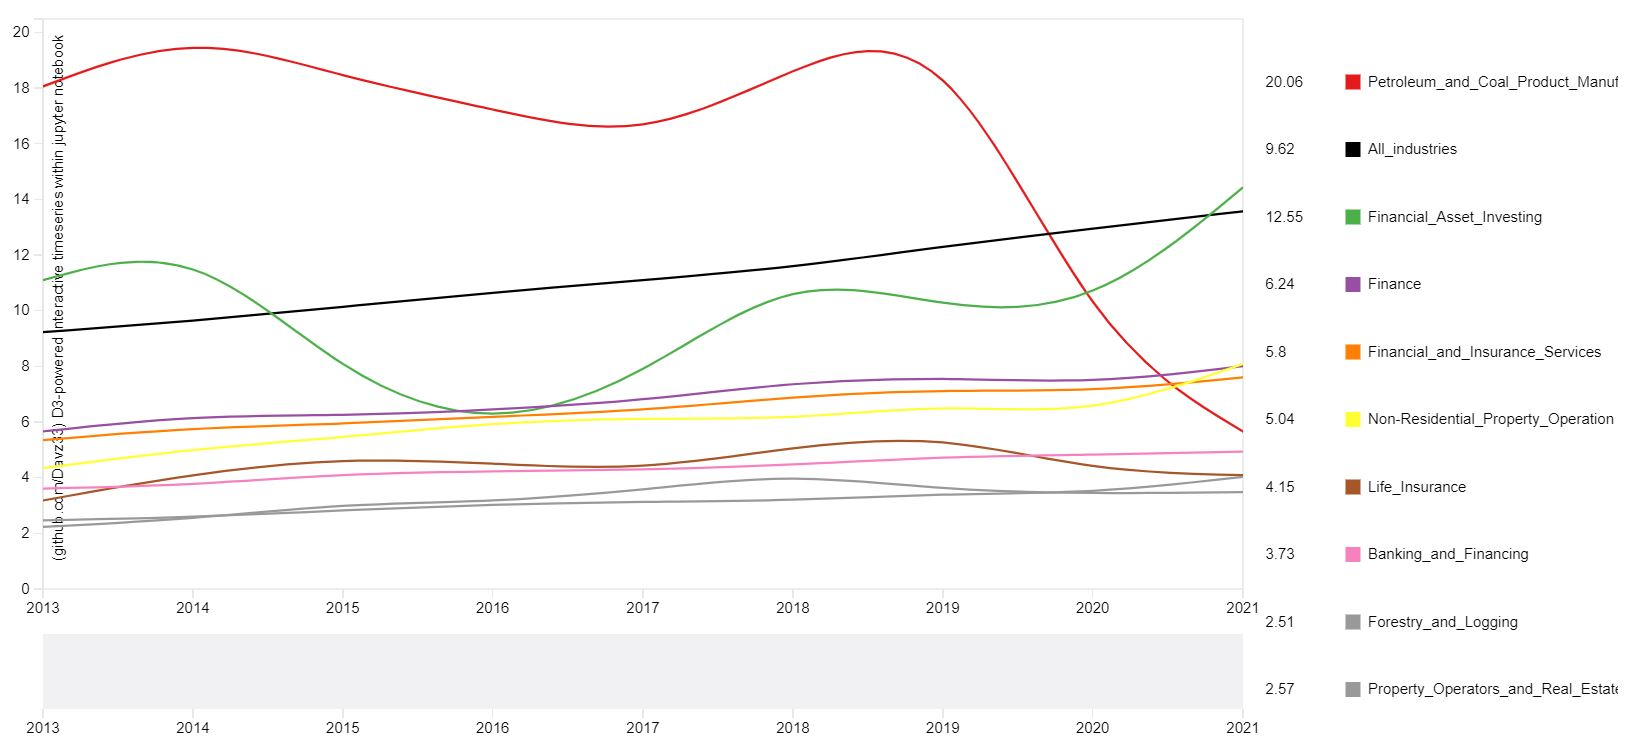